## Problem Statement

XXXXXXX company is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of xxxxx Comapny , focused on profiling the best companies and job positions to work for from the company  database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.



Data Dictionary:

    ‘Unnamed 0’- Index of the dataset
    Email_hash- Anonymised Personal Identifiable Information (PII)
    Company_hash- Current employer of the learner
    orgyear- Employment start date
    CTC- Current CTC
    Job_position- Job profile in the company
    CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import regex as re

In [4]:
df = pd.read_csv("D:\DSML\Datasets\scaler_clustering.csv")

In [5]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
df.shape

(205843, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [8]:
### There is no need of columns 

In [9]:
df["email_hash"].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

Observation

There are quite a lot of duplicate values of emails, these probably are repeat entries

we will drop these entries from data

In [10]:
df.job_position

0                      Other
1         FullStack Engineer
2           Backend Engineer
3           Backend Engineer
4         FullStack Engineer
                 ...        
205838                   NaN
205839                   NaN
205840                   NaN
205841                   NaN
205842                   NaN
Name: job_position, Length: 205843, dtype: object

In [11]:
df = df.drop_duplicates(subset=['email_hash'], keep='last')

In [12]:
df.shape

(153443, 7)

In [13]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
7,7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0
13,13,wgszxkvzn,134cc4a76a119493d523f1855a3b7106f64287455d5cd4...,2016.0,440000,Data Analyst,2020.0
14,14,xznhxn,ebcaf397ef5084e05889a6e9a0c3f96a5c8fb0b16749ce...,2016.0,440000,Backend Engineer,2019.0


In [14]:
 df['email_hash'].value_counts()

effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7    1
d8e8d73114617d98f7b647d6a2943983564978c3999509d98d6d5142714c7958    1
0a2c6b808187b21a9ab6b27f2365dc315cd4f64c5c908f12e387303a340dbd9a    1
77e5e9c3b29bef911b71f1ec28753029aad23172f0f6fb5ffdbfb47e086f9148    1
9ec7bc44fb8497e552087e27b3f264773c11f91e67a615d17be2a6112dad8743    1
                                                                   ..
a92418070ae61c6a53ac35b2f5748e95a0a7e5ee823cee3f4f3cf5ce82702bf8    1
65a8bb70616d56b0c8a57c229716cee6e8ee9bd690cc26203693858175313449    1
2b166c2eefe21566e54403538a39e65851cfdd64a51a3bdf1f48476d0a5ce11e    1
28992538aebfd55c662be0ef06c7a5ec32d85de4e260ef12ddddcf43066d6e29    1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31    1
Name: email_hash, Length: 153443, dtype: int64

In [15]:
df.isna().sum()

Unnamed: 0              0
company_hash           34
email_hash              0
orgyear                79
ctc                     0
job_position        34189
ctc_updated_year        0
dtype: int64

### Using a text cleaning regex function for job position column

In [16]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
    
mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [17]:
df["job_position"].nunique()

652

In [18]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

557

In [19]:
df.shape

(153443, 7)

In [20]:

df['company_hash'].value_counts().sort_index()

0                                    1
0000                                 1
01 ojztqsj                           2
05mz exzytvrny uqxcvnt rxbxnta       1
1                                    2
                                    ..
zyvzwt fgga qtztfvr eqvzwyxogq yi    1
zyvzwt wgzohrnxzs tzsxzttqo          1
zz                                   2
zzb ztdnstz vacxogqj ucn rna         1
zzgato                               1
Name: company_hash, Length: 36365, dtype: int64

In [21]:
df.isna().sum() * 100/len(df)

Unnamed: 0          0.000000
company_hash        0.022158
email_hash          0.000000
orgyear             0.051485
ctc                 0.000000
job_position        0.000000
ctc_updated_year    0.000000
dtype: float64

### Observation 

we will only impute the org year col as the other cols have very less percent of nulls we will drop those cols

In [22]:
df.isna().sum()

Unnamed: 0           0
company_hash        34
email_hash           0
orgyear             79
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

### Assigning appropriate values to missing data



### Filling Null values using Mean Target Inputation for Orgyear

In [23]:
#We see some 'nan's in job_position 
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [24]:
## filling nan values with others
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [25]:
df.job_position

3         backend engineer
7         backend engineer
9                   Others
13            data analyst
14        backend engineer
                ...       
205838              Others
205839              Others
205840              Others
205841              Others
205842              Others
Name: job_position, Length: 153443, dtype: object

In [26]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)

In [27]:
df = df.loc[~df['orgyear'].isna()]

In [28]:
df.isna().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [29]:
df.dropna(subset=['company_hash'], inplace=True)

In [30]:
df.isna().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [31]:
df.job_position

3         backend engineer
7         backend engineer
9                   Others
13            data analyst
14        backend engineer
                ...       
205838              Others
205839              Others
205840              Others
205841              Others
205842              Others
Name: job_position, Length: 153418, dtype: object

#### Creating a new feature of no of year of experience

Before creating new feature we need to see outliers and remove it

<AxesSubplot:>

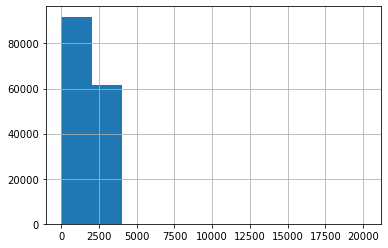

In [32]:
df["orgyear"].hist(bins=10)

<AxesSubplot:xlabel='ctc', ylabel='Count'>

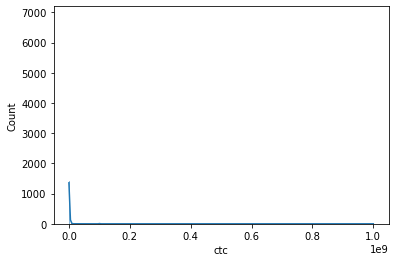

In [33]:
sns.histplot(data = df, x = "ctc", kde = True)

In [59]:
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.02), upper=df.ctc.quantile(0.98))

In [60]:
df.shape

(153418, 6)

In [61]:
df["orgyear"].describe()

count    153418.000000
mean       2014.838832
std           4.209035
min        2000.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2021.000000
Name: orgyear, dtype: float64

In [62]:
## Now we have the max year as 2021 unlike before 20165

In [63]:
## getting the no of years of Experience with respect to 2022
df['yrs_exp']=2022-df['orgyear']

In [64]:
# update cant be before joining
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

Grouping Companies named others where the count is less than 5

In [65]:
df["company_hash"].value_counts()

Others                       42040
nvnv wgzohrnvzwj otqcxwto     5336
xzegojo                       3526
vbvkgz                        2440
wgszxkvzn                     2199
                             ...  
zvnfton sqghu                    5
ntlvo pghzaxzjv                  5
zxrr                             5
ofxenwy                          5
fxuqg                            5
Name: company_hash, Length: 2963, dtype: int64

In [66]:
df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'

In [67]:
df.describe(include="all")

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp
count,153418,153418.000000,1.534180e+05,153418,153418.000000,153418.000000
unique,2963,NaN,NaN,557,NaN,NaN
top,Others,NaN,NaN,Others,NaN,NaN
freq,42040,NaN,NaN,34185,NaN,NaN
mean,NaN,2014.838832,1.368333e+06,NaN,2019.477473,7.161168
std,NaN,4.209035,1.310615e+06,NaN,1.310497,4.209035
min,NaN,2000.000000,8.000000e+04,NaN,2015.000000,1.000000
25%,NaN,2013.000000,5.500000e+05,NaN,2019.000000,4.000000
50%,NaN,2016.000000,9.500000e+05,NaN,2019.000000,6.000000
75%,NaN,2018.000000,1.700000e+06,NaN,2021.000000,9.000000




### we do not need columns unnamed and email_hash

dropping them

In [ ]:
df = df.drop(["Unnamed: 0", "email_hash" ], axis = 1)

In [70]:
df.describe(include="all")

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp
count,153418,153418.000000,1.534180e+05,153418,153418.000000,153418.000000
unique,2963,NaN,NaN,557,NaN,NaN
top,Others,NaN,NaN,Others,NaN,NaN
freq,42040,NaN,NaN,34185,NaN,NaN
mean,NaN,2014.838832,1.368333e+06,NaN,2019.477473,7.161168
std,NaN,4.209035,1.310615e+06,NaN,1.310497,4.209035
min,NaN,2000.000000,8.000000e+04,NaN,2015.000000,1.000000
25%,NaN,2013.000000,5.500000e+05,NaN,2019.000000,4.000000
50%,NaN,2016.000000,9.500000e+05,NaN,2019.000000,6.000000
75%,NaN,2018.000000,1.700000e+06,NaN,2021.000000,9.000000


In [71]:
df.shape

(153418, 6)

In [72]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0
9,Others,2019.0,360000.0,Others,2019.0,3.0
13,wgszxkvzn,2016.0,440000.0,data analyst,2020.0,6.0
14,xznhxn,2016.0,440000.0,backend engineer,2019.0,6.0
...,...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000.0,Others,2019.0,14.0
205839,husqvawgb,2017.0,500000.0,Others,2020.0,5.0
205840,vwwgrxnt,2021.0,700000.0,Others,2021.0,1.0
205841,zgn vuurxwvmrt,2019.0,5100000.0,Others,2019.0,3.0


### EDA

<AxesSubplot:xlabel='yrs_exp', ylabel='Count'>

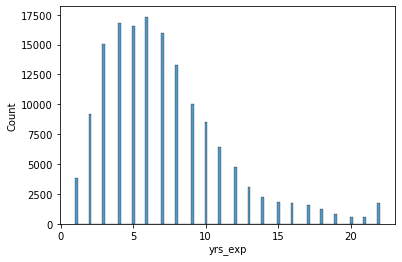

In [47]:
sns.histplot(data = df, x = 'yrs_exp')

<AxesSubplot:xlabel='ctc', ylabel='Count'>

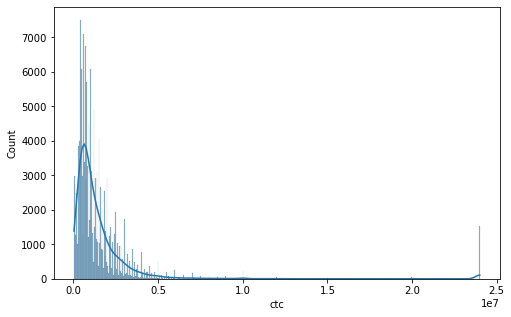

In [49]:
plt.figure(figsize=(8,5))

sns.histplot(data = df, x = 'ctc', kde = True)

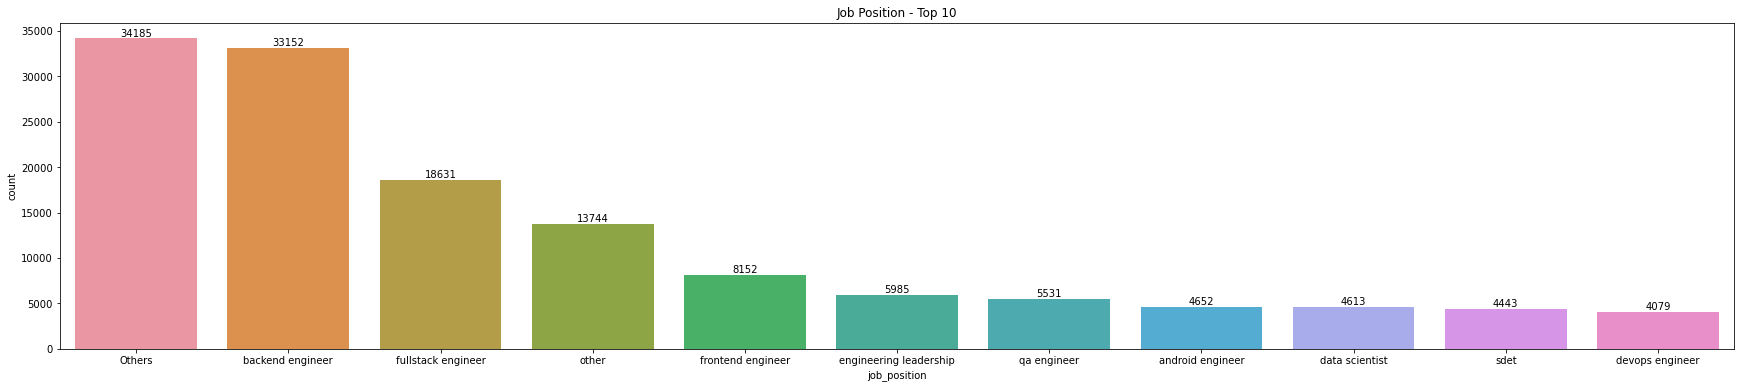

In [52]:
plt.figure(figsize=(30,6))
ax = sns.countplot(data = df, 
              x = 'job_position', 
              order = df['job_position'].value_counts().index[:11], linewidth=0.5)
ax.bar_label(ax.containers[0])
plt.title('Job Position - Top 10')
plt.show()

In [ ]:
orgyear

<AxesSubplot:xlabel='orgyear', ylabel='Count'>

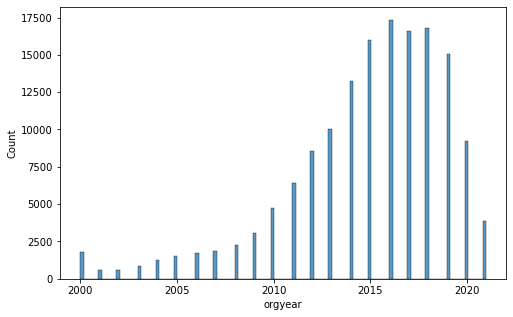

In [56]:
plt.figure(figsize=(8,5))

sns.histplot(data = df, x = 'orgyear')

<AxesSubplot:xlabel='ctc'>

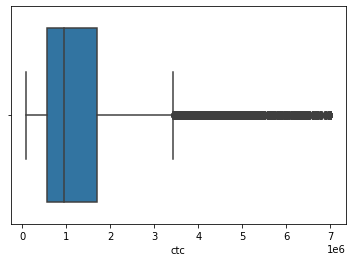

In [73]:
sns.boxplot(data = df, x = 'ctc')

In [50]:
df.describe()

,orgyear,ctc,ctc_updated_year,yrs_exp
count,153418.000000,1.534180e+05,153418.000000,153418.000000
mean,2014.838832,1.572169e+06,2019.477473,7.161168
std,4.209035,2.669356e+06,1.310497,4.209035
min,2000.000000,3.500000e+04,2015.000000,1.000000
25%,2013.000000,5.500000e+05,2019.000000,4.000000
50%,2016.000000,9.500000e+05,2019.000000,6.000000
75%,2018.000000,1.700000e+06,2021.000000,9.000000
max,2021.000000,2.400000e+07,2021.000000,22.000000


#### Observation

> Backend, fulllstack, frontend are some of the most frequent job lists

> Majority of people have 8 or less years of experience

> Mean ctc is 1368333 and median ctc is 950000 and valeus a very skewed

### Manual Clustering

In [102]:
df_group_y_j_c = df.groupby(['yrs_exp','job_position','company_hash'])['ctc'].describe()
df_group_y_j_c

count          mean  \
yrs_exp job_position         company_hash                                     
1.0                          Others                       1.0  4.500000e+05   
        Others               Others                     224.0  1.405647e+06   
                             adw ntwyzgrgsj               1.0  3.600000e+05   
                             athnowyt ntrtpgb             1.0  2.800000e+06   
                             atrgxnnt                     1.0  7.500000e+05   
...                                                       ...           ...   
22.0    support engineer     xmb xzaxv uqxcvnt rxbxnta    1.0  5.000000e+05   
                             zgzt                         1.0  1.600000e+06   
        system admin         zgn vuurxwvmrt vwwghzn       1.0  5.000000e+05   
        technology architect vwwtznhqt                    1.0  4.200000e+06   
        trainer              Others                       1.0  4.000000e+05   

                                                                 std  \
yrs_exp job_position         company_hash                              
1.0                          Others                              NaN   
        Others               Others                     1.864368e+06   
                             adw ntwyzgrgsj                      NaN   
                             athnowyt ntrtpgb                    NaN   
                             atrgxnnt                            NaN   
...                                                              ...   
22.0    support engineer     xmb xzaxv uqxcvnt rxbxnta           NaN   
                             zgzt                                NaN   
        system admin         zgn vuurxwvmrt vwwghzn              NaN   
        technology architect vwwtznhqt                           NaN   
        trainer              Others                              NaN   

                                                              min        25%  \
yrs_exp job_position         company_hash                                      
1.0                          Others                      450000.0   450000.0   
        Others               Others                       80000.0   360000.0   
                             adw ntwyzgrgsj              360000.0   360000.0   
                             athnowyt ntrtpgb           2800000.0  2800000.0   
                             atrgxnnt                    750000.0   750000.0   
...                                                           ...        ...   
22.0    support engineer     xmb xzaxv uqxcvnt rxbxnta   500000.0   500000.0   
                             zgzt                       1600000.0  1600000.0   
        system admin         zgn vuurxwvmrt vwwghzn      500000.0   500000.0   
        technology architect vwwtznhqt                  4200000.0  4200000.0   
        trainer              Others                      400000.0   400000.0   

                                                              50%        75%  \
yrs_exp job_position         company_hash                                      
1.0                          Others                      450000.0   450000.0   
        Others               Others                      700000.0  1402500.0   
                             adw ntwyzgrgsj              360000.0   360000.0   
                             athnowyt ntrtpgb           2800000.0  2800000.0   
                             atrgxnnt                    750000.0   750000.0   
...                                                           ...        ...   
22.0    support engineer     xmb xzaxv uqxcvnt rxbxnta   500000.0   500000.0   
                             zgzt                       1600000.0  1600000.0   
        system admin         zgn vuurxwvmrt vwwghzn      500000.0   500000.0   
        technology architect vwwtznhqt                  4200000.0  4200000.0   
        trainer              Others                      400000.0   400000.0   

         

In [103]:
df_y_j_c=df.merge(df_group_y_j_c, on=['yrs_exp','job_position','company_hash'], how='left')
df_y_j_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,6.0,1.060000e+06,3.391165e+05,700000.0,812500.0,1025000.0,1207500.0,1600000.0
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,2.0,4.250000e+05,3.535534e+04,400000.0,412500.0,425000.0,437500.0,450000.0
2,Others,2019.0,360000.0,Others,2019.0,3.0,1084.0,8.385185e+05,1.025635e+06,80000.0,350000.0,520000.0,900000.0,7000000.0
3,wgszxkvzn,2016.0,440000.0,data analyst,2020.0,6.0,12.0,5.910832e+05,2.898958e+05,150000.0,410750.0,480000.0,750000.0,1100000.0
4,xznhxn,2016.0,440000.0,backend engineer,2019.0,6.0,10.0,2.390000e+06,9.404254e+05,440000.0,1862500.0,2495000.0,3075000.0,3600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153413,vuurt xzw,2008.0,220000.0,Others,2019.0,14.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
153414,husqvawgb,2017.0,500000.0,Others,2020.0,5.0,4.0,1.202500e+06,4.719022e+05,500000.0,1145000.0,1405000.0,1462500.0,1500000.0
153415,vwwgrxnt,2021.0,700000.0,Others,2021.0,1.0,2.0,8.500000e+05,2.121320e+05,700000.0,775000.0,850000.0,925000.0,1000000.0
153416,zgn vuurxwvmrt,2019.0,5100000.0,Others,2019.0,3.0,185.0,1.449150e+06,1.806782e+06,80000.0,400000.0,720000.0,1500000.0,7000000.0


#### Defining a function to divide data into 3 sub categories

In [104]:
def segment(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2
    
    elif a>=b_75:
        return 1

In [105]:
df_y_j_c['designation'] = df_y_j_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_y_j_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max,designation
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,6.0,1060000.0,339116.499156,700000.0,812500.0,1025000.0,1207500.0,1600000.0,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,2.0,425000.0,35355.339059,400000.0,412500.0,425000.0,437500.0,450000.0,3


In [106]:
df_y_j_c.designation.value_counts(normalize=True)

2    0.446382
3    0.345116
1    0.208502
Name: designation, dtype: float64

In [107]:
df_y_j_c.shape

(153418, 15)

## Manual Clustering based on company and job position 

In [108]:
df_grp_c_j = df.groupby(['job_position','company_hash'])['ctc'].describe()

In [109]:
df_grp_c_j.head()

count       mean            std        min  \
job_position company_hash                                                
             Others           4.0   480000.0  152534.149182   350000.0   
             fyxntyvn lq      1.0   600000.0            NaN   600000.0   
             otre tburgjta    1.0   600000.0            NaN   600000.0   
             wgszxkvzn        1.0   470000.0            NaN   470000.0   
             yaew mvzp        1.0  7000000.0            NaN  7000000.0   

                                  25%        50%        75%        max  
job_position company_hash                                               
             Others          402500.0   435000.0   512500.0   700000.0  
             fyxntyvn lq     600000.0   600000.0   600000.0   600000.0  
             otre tburgjta   600000.0   600000.0   600000.0   600000.0  
             wgszxkvzn       470000.0   470000.0   470000.0   470000.0  
             yaew mvzp      7000000.0  7000000.0  7000000.0  7000000.0

In [110]:
df_cj=df.merge(df_grp_c_j, on=['job_position','company_hash'], how='left')
df_cj.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,22.0,1.515000e+06,6.837902e+05,700000.0,1062500.0,1375000.0,1797500.0,3500000.0
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,6.0,1.243333e+06,1.147635e+06,400000.0,565000.0,1005000.0,1100000.0,3500000.0
2,Others,2019.0,360000.0,Others,2019.0,3.0,7420.0,1.075687e+06,1.190796e+06,80000.0,400000.0,700000.0,1300000.0,7000000.0
3,wgszxkvzn,2016.0,440000.0,data analyst,2020.0,6.0,90.0,8.355333e+05,1.186427e+06,80000.0,412500.0,555000.0,795000.0,7000000.0
4,xznhxn,2016.0,440000.0,backend engineer,2019.0,6.0,66.0,2.891712e+06,1.556783e+06,80000.0,2010000.0,2615000.0,3500000.0,7000000.0


In [111]:
### Creating Class basis on the salary they are getting in their respective company

In [112]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max,classs
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,22.0,1.515000e+06,6.837902e+05,700000.0,1062500.0,1375000.0,1797500.0,3500000.0,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,6.0,1.243333e+06,1.147635e+06,400000.0,565000.0,1005000.0,1100000.0,3500000.0,3
2,Others,2019.0,360000.0,Others,2019.0,3.0,7420.0,1.075687e+06,1.190796e+06,80000.0,400000.0,700000.0,1300000.0,7000000.0,3
3,wgszxkvzn,2016.0,440000.0,data analyst,2020.0,6.0,90.0,8.355333e+05,1.186427e+06,80000.0,412500.0,555000.0,795000.0,7000000.0,3
4,xznhxn,2016.0,440000.0,backend engineer,2019.0,6.0,66.0,2.891712e+06,1.556783e+06,80000.0,2010000.0,2615000.0,3500000.0,7000000.0,3


In [113]:
df_cj.classs.value_counts(normalize=True)

3    0.438606
2    0.319363
1    0.242032
Name: classs, dtype: float64

In [114]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,8332.0,2.544821e+06,1.652757e+06,100000.0,1400000.0,2000000.0,3100000.0,7000000.0
backend engineer,8232.0,2.791761e+06,1.634072e+06,110000.0,1650000.0,2300000.0,3500000.0,7000000.0
fullstack engineer,4606.0,2.386272e+06,1.620837e+06,95000.0,1380000.0,1800000.0,2800000.0,7000000.0
other,3401.0,2.632728e+06,2.096622e+06,100000.0,1200000.0,1800000.0,3160000.0,7000000.0
frontend engineer,1945.0,2.094382e+06,1.438352e+06,300000.0,1300000.0,1600000.0,2250000.0,7000000.0
engineering leadership,1433.0,4.434621e+06,1.536781e+06,200000.0,3400000.0,4100000.0,5500000.0,7000000.0
qa engineer,1344.0,2.015084e+06,1.543282e+06,200000.0,1000000.0,1450000.0,2580000.0,7000000.0
android engineer,1135.0,2.011853e+06,1.359870e+06,85000.0,1200000.0,1500000.0,2300000.0,7000000.0
data scientist,1130.0,2.668510e+06,1.494419e+06,115000.0,1780000.0,2200000.0,3000000.0,7000000.0


In [115]:
df_y_j_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'yrs_exp', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'designation'],
      dtype='object')

In [116]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_y_j_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [117]:
df_cjy_cj=df_cj.merge(df_y_j_c, on=['company_hash','orgyear','ctc','job_position','yrs_exp','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,classs,designation
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,3
2,Others,2019.0,360000.0,Others,2019.0,3.0,3,3
3,Others,2019.0,360000.0,Others,2019.0,3.0,3,3
4,Others,2019.0,360000.0,Others,2019.0,3.0,3,3
...,...,...,...,...,...,...,...,...
393901,vuurt xzw,2008.0,220000.0,Others,2019.0,14.0,3,2
393902,husqvawgb,2017.0,500000.0,Others,2020.0,5.0,3,3
393903,vwwgrxnt,2021.0,700000.0,Others,2021.0,1.0,3,3
393904,zgn vuurxwvmrt,2019.0,5100000.0,Others,2019.0,3.0,1,1


### Creating Tier basis on the salary in the companies

In [118]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,53.0,1.710472e+06,945808.701665,200000.0,1100000.0,1450000.0,2000000.0,4700000.0
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,15.0,8.820000e+05,782415.673229,300000.0,425000.0,770000.0,1005000.0,3500000.0


In [119]:
df_c['tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,count,mean,std,min,25%,50%,75%,max,tier
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,53.0,1.710472e+06,9.458087e+05,200000.0,1100000.0,1450000.0,2000000.0,4700000.0,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,15.0,8.820000e+05,7.824157e+05,300000.0,425000.0,770000.0,1005000.0,3500000.0,3
2,Others,2019.0,360000.0,Others,2019.0,3.0,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
3,wgszxkvzn,2016.0,440000.0,data analyst,2020.0,6.0,2199.0,8.016315e+05,9.108555e+05,80000.0,400000.0,579000.0,830000.0,7000000.0,3
4,xznhxn,2016.0,440000.0,backend engineer,2019.0,6.0,202.0,2.764324e+06,1.627794e+06,80000.0,1800000.0,2500000.0,3500000.0,7000000.0,3


In [120]:
df_c["tier"].value_counts(normalize=True)

3    0.482049
2    0.273410
1    0.244541
Name: tier, dtype: float64

In [121]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','yrs_exp','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3,3,53.0,1.710472e+06,9.458087e+05,200000.0,1100000.0,1450000.0,2000000.0,4700000.0,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,3,15.0,8.820000e+05,7.824157e+05,300000.0,425000.0,770000.0,1005000.0,3500000.0,3
2,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
3,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
4,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
5,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
6,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
7,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
8,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3
9,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,42040.0,1.193627e+06,1.321653e+06,80000.0,450000.0,800000.0,1400000.0,7000000.0,3


In [122]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,classs,designation,tier
0,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3,3,3
1,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,3,3


In [124]:
X = df_cjy_cj_c[['ctc', 'yrs_exp', 'classs', 'designation', 'tier']].copy()

#### Scaling data

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scl = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [126]:
X_scl.shape

(5168266, 5)

### Hierarchy Clustering

Text(0, 0.5, 'distance')

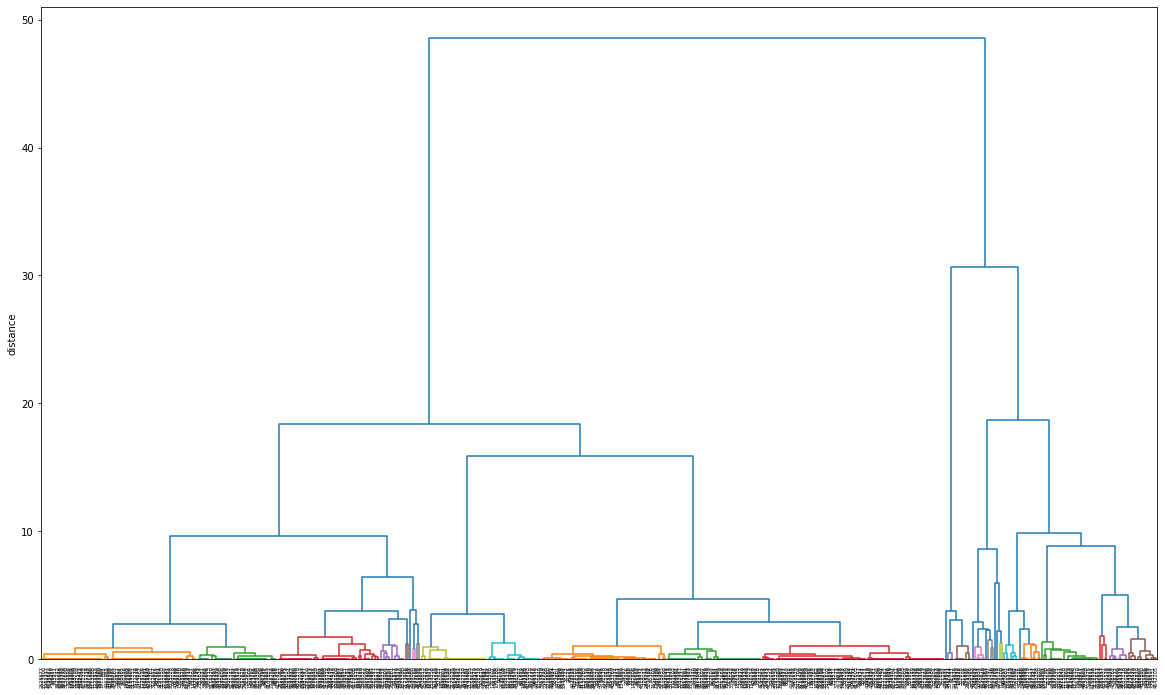

In [127]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_scl.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

### Observation

The above plot suggests there are about 3 clusters

### Kmeans Cluster

In [130]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scl)
labels = kmeans.predict(X_scl)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

In [132]:
wcss = []
for k in range(1, 10):
    model = KMeans(n_clusters = k)
    model.fit(X_scl)
    wcss.append(model.inertia_)

    

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans

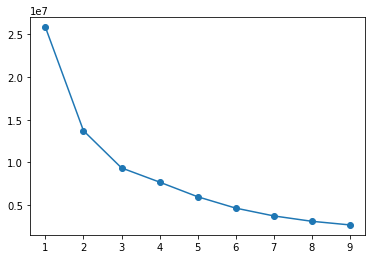

In [133]:
plt.plot(range(1, 10), wcss, '-o')

### Observation

The elbow method suggest that there possibly 3 clusters

### Insights and Recommendations

Following metrics have given us 3 clusters on both the methods. LOt of jobs are grouped under others category

In order to get a much detailed insights we need further analyze the data and need more processing under company names and other job category

A lot of jobs are categorized under Other category which can potentially generalize a real picture of our clusters

I believe we need to manually target encode the categories job position which are NAs with grouby filling other and na categories

variables like job position and org year when paired with ctc plays important role in clustering the candidates and in current scenario it does not reflect a very good picture with many of these values generalised.

We need to analyze the data again with more targeted imputation to get more perfect cluster